In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from scipy.signal import TransferFunction, step

# Problem 1B

In [14]:
import sympy as sp

def solve_system(equations, variables):
    """
    Solves a system of equations for the given variables.

    Parameters:
    - equations: A list of equations (e.g., [eq1, eq2, eq3])
    - variables: A list of unknowns to solve for (e.g., [x, y, z])

    Returns:
    - A dictionary mapping each variable to its solution.
    """
    solutions = sp.solve(equations, variables, dict=True)
    return solutions

# x is taud
# y is taui
# z is tauf
# w is tauc
x, y, z, s = sp.symbols('x y z s')

eq1 = sp.Eq(y * z * x, 8)
eq2 = sp.Eq(y + z, 6)
eq3 = sp.Eq(y * (1 + z * s), (4 * s**2 - s))


solutions = solve_system([eq1, eq2, eq3], [x, y, z])


In [15]:
s_values = np.linspace(0, 50, 100)
numerical_solutions = [{var: sol.subs(s, val) for var, sol in sol_dict.items()} for sol_dict in solutions for val in s_values]

print(numerical_solutions[0])

{x: zoo, y: nan, z: nan}


# Problem 1C

In [6]:
G1_num = [3]
G1_den = [2, 1]
G2_num = [-4]
G2_den = [4, 1]

G_num = np.polyadd(G1_num, G2_num)
G_den = np.polymul(G1_den, G2_den)

In [66]:
tau_c_values = [1, 5, 10]
responses = {}

for tau_c in tau_c_values:
    Kc = -4 *tau_c
    Ti = 10.0
    Td = -0.20
    Tf = -4.0

    C_num = [Kc * Td * Tf, Kc * (Ti + Tf), Kc]
    C_den = [Ti, 0]
    OL_num = np.polymul(C_num, G_num)
    OL_den = np.polymul(C_den, G_den)
    CL_num = OL_num
    CL_den = np.polyadd(OL_den, OL_num)
    CL_system = TransferFunction(CL_num, CL_den)

    time = np.linspace(0, 50, 500)
    t, y = step(CL_system, T=time)
    responses[tau_c] = (t, y)


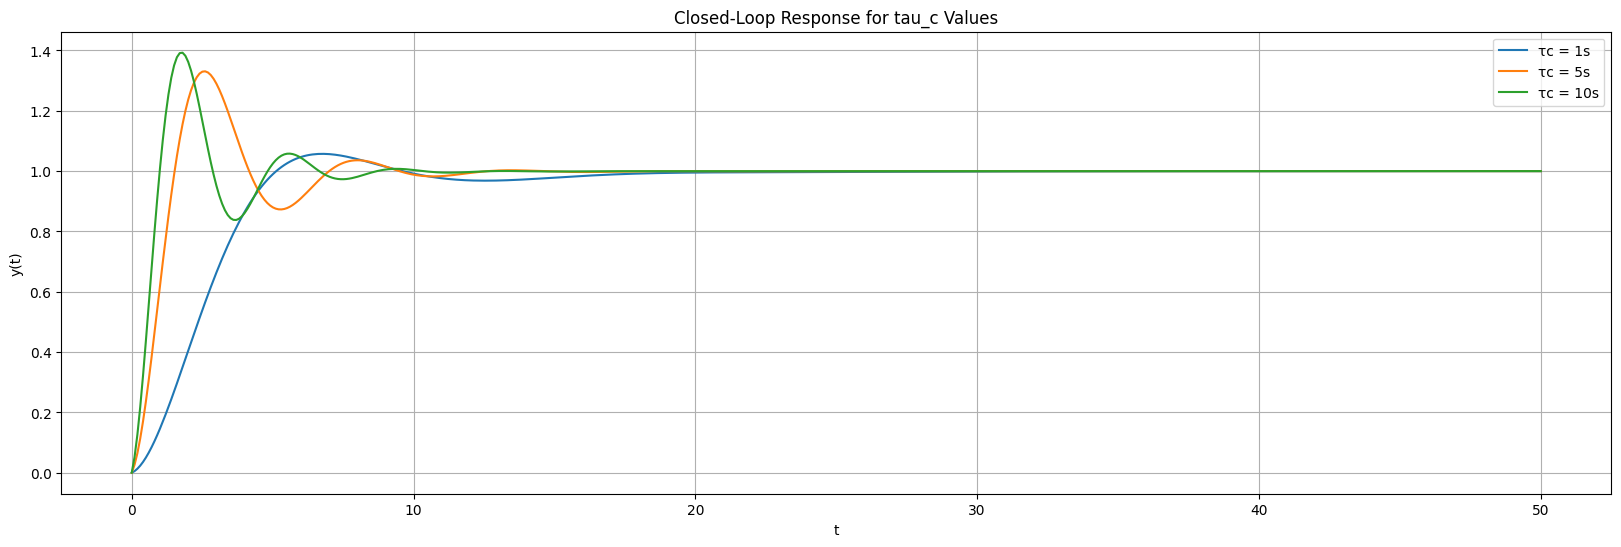

In [67]:
plt.figure(figsize=(20, 6))
for tau_c, (t, y) in responses.items():
    plt.plot(t, y, label=f"τc = {tau_c}s")

plt.title("Closed-Loop Response for tau_c Values")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()